# **Task 7: Influencer Outreach Message using Prompt Engineering**

## **Project Overview**
This notebook demonstrates how AI can assist marketing teams in creating
**professional influencer outreach messages** across multiple modalities.

The task focuses on generating:
- Personalized influencer outreach messages (text)
- Supporting creative visuals (image generation)
- Optional voice-based outreach scripts (audio)

The solution uses **prompt engineering** and **modality-aware AI models**
via an OpenAI-compatible Nexus API.


## **Problem Statement**
Influencer marketing requires personalized, professional communication
that aligns with both the brand and the influencer’s audience.

Manual outreach is:
- Time-consuming
- Hard to personalize at scale
- Inconsistent across influencers and platforms

## **Domain Challenges**
- Crafting personalized outreach messages
- Aligning brand tone with influencer style
- Creating supporting creatives for outreach
- Scaling outreach across platforms and regions


#Target Audience
-Social Media Manager

-Email Marketing Specialist

-Product Marketing Manager

-Brand Manager

-Performance Marketing Analyst

-Market Research Analyst

## **Features & Capabilities**
- Personalized influencer outreach message generation
- Industry-grade image generation for outreach creatives
- Optional voice-based outreach script generation
- Reusable prompt templates
- Multi-modal content creation pipeline


| Prompt | Purpose | Prompting Technique | Model Used | Model Modality | Model Provider (via Nexus API) |
|------|--------|--------------------|-----------|---------------|-------------------------------|
| Prompt 1 | Influencer outreach message | Role-Based + Structured + Zero-shot | gpt-4.1-nano | Text → Text | OpenAI (via Navigate Labs Nexus API) |
| Prompt 2 | Outreach creative image | Zero-shot + Instruction-based + Visual Constraints | imagen-4.0-fast-generate-001 | Text → Image | Google (Imagen) via Navigate Labs Nexus API |
| Prompt 3 | Voice-based outreach script | Structured + Zero-shot | gpt-4o-mini-tts | Text → Audio | OpenAI (via Navigate Labs Nexus API) |


### **Use Case 1: Text-Based Influencer Outreach Message**

Objective:
Generate a professional and personalized influencer outreach message.

Input Modality : Text  
Output Modality: Text

Prompting Technique:
- Role-Based Prompting
- Structured Prompting
- Zero-Shot Prompting


In [ ]:
# Install necessary Python packages
!pip install openai
!pip install python-dotenv

In [ ]:
# Import required modules
import os
from openai import OpenAI

# Set API credentials in environment variables
os.environ["OPENAI_API_KEY"] = "YOUR API KEY"
os.environ["OPENAI_BASE_URL"] = "https://apidev.navigatelabsai.com/"

# Initialize OpenAI client
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL")
)

In [ ]:
# Take user input for product description
print("Enter product / brand description:")
product_description = input()

# Take user input for influencer niche
print("Enter influencer niche (e.g., tech, fitness, fashion):")
influencer_niche = input()

Enter product / brand description:
GPU
Enter influencer niche (e.g., tech, fitness, fashion):
tech


In [ ]:
# Define prompt for influencer outreach message generation
prompt1 = f"""
You are a senior influencer marketing manager representing a brand partnership team.

Task:
Create a professional, personalized influencer outreach message for an initial brand collaboration.

Brand / Product:
{product_description}

Influencer Niche:
{influencer_niche}

Objective:
Introduce the brand, establish relevance to the influencer’s content,
and invite them to explore a potential collaboration.

Message Structure:
1. Personalized opening that acknowledges the influencer’s niche or content style
2. Brief, clear brand introduction (what the product is and who it serves)
3. Value proposition explaining why this collaboration is relevant to the influencer’s audience
4. Collaboration intent (e.g., product trial, sponsored content, long-term partnership)
5. Polite, low-pressure call-to-action to continue the conversation

Tone & Style Guidelines:
- Professional, warm, and respectful
- Friendly but not overly casual
- Confident and partnership-focused (not salesy)
- Written as a genuine human message, not a mass outreach

Channel Suitability:
- Must be appropriate for Email or Instagram/LinkedIn DM
- Keep the length concise and easy to read on mobile

Output Requirements:
- Return only the outreach message text
- No emojis unless contextually appropriate
- No hashtags or promotional links
"""

# Generate influencer outreach message using the language model
response1 = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[{"role": "user", "content": prompt1}]
)

print(response1.choices[0].message.content)

Subject: Collaboration Opportunity with [Brand Name] – Elevate Your Tech Content

Hi [Influencer's Name],

I hope you're doing well! I’m [Your Name], a senior influencer marketing manager with [Brand Name]. We’re passionate about pushing the boundaries of performance with our latest high-end GPU, designed for gamers, streamers, and tech enthusiasts.

We admire your content and believe your innovative approach aligns perfectly with our brand. We’d love to explore a collaboration that highlights how our GPU can enhance gaming and creative experiences for your audience.

If you're interested, I’d be happy to share more details and discuss how we can create compelling content together.

Looking forward to connecting!

Best regards,  
[Your Name]  
[Your Position]  
[Brand Name]  
[Contact Info]


### **Use Case 2: Influencer Outreach Creative (Image Generation)**

Objective:
Generate a clear, professional marketing image to support influencer outreach.

Input Modality: Text  
Output Modality: Image

Prompting Technique:
- Zero-Shot Prompting
- Instruction-Based Prompting
- Visual Constraint Prompting


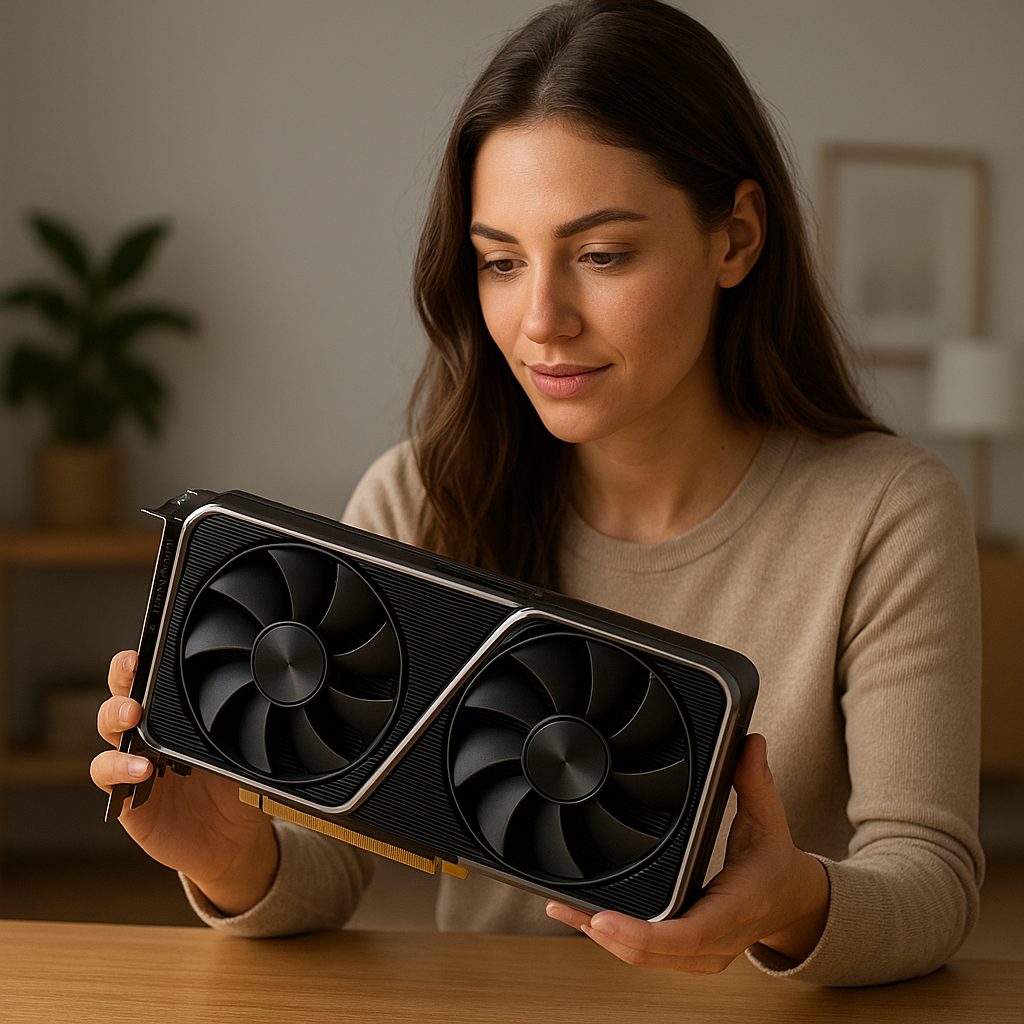

In [ ]:
# Import required libraries for image display and decoding
from IPython.display import Image, display
from PIL import Image as PILImage
from io import BytesIO
import base64

# Create image prompt based on product and influencer niche
image_prompt = f"""
High-end influencer marketing advertisement image.

Product:
{product_description}

Scene & Context:
Lifestyle environment that strongly matches the {influencer_niche} niche.
Natural, aspirational setting that feels authentic to real influencer content
(e.g., everyday use, not staged or artificial).

Visual Composition:
- Clear product focus in the foreground
- Influencer interaction with the product (natural usage, not posing)
- Balanced framing with negative space suitable for social media ads
- Rule-of-thirds composition
- Shallow depth of field to subtly highlight the product

Lighting & Color:
- Soft, professional studio-style lighting or natural golden-hour lighting
- Clean, modern color palette aligned with premium brand advertising
- High contrast and sharp details
- Realistic shadows and reflections

Style & Quality:
- Photorealistic, commercial-grade quality
- Social-media ad aesthetic (Instagram / LinkedIn / brand collaborations)
- Modern, minimal, and polished look
- High clarity, ultra-sharp focus

Restrictions:
- No logos
- No text overlays
- No watermarks
- No exaggerated or cartoon styles
"""

# Generate image from text prompt with safe fallback handling
try:
    image_response = client.images.generate(
        model="gpt-image-1-mini",
        prompt=image_prompt,
        size="1024x1024"
    )

    image_data = image_response.data[0]

         # Display image if URL is returned
    if hasattr(image_data, "url") and image_data.url:
        display(Image(url=image_data.url))

         # Display image if Base64 data is returned
    elif hasattr(image_data, "b64_json") and image_data.b64_json:
        img_bytes = base64.b64decode(image_data.b64_json)
        img = PILImage.open(BytesIO(img_bytes))
        display(img)
    else:
        raise ValueError("No image data returned.")

# Fallback in case image generation is unavailable
except Exception as e:
    print("Image generation failed.")
    print("Fallback image prompt:")
    print(image_prompt)


### **Use Case 3: Audio Outreach Message Script**

Objective:
Generate a spoken outreach message script for influencer collaboration.

Input Modality: Text  
Output Modality: Audio (script → speech)

Prompting Technique:
- Role-Based Prompting
- Structured Prompting
- Zero-Shot Prompting


In [ ]:
# Create prompt for generating a spoken influencer outreach script
audio_prompt = f"""
You are a professional brand partnerships manager creating a voice-based
influencer outreach message for an initial collaboration invite.

Target Influencer Niche:
{influencer_niche}

Brand / Product:
{product_description}

Objective:
Create a short spoken outreach message that introduces the brand,
builds credibility, and invites the influencer to explore a collaboration.

Message Structure:
1. Warm, personalized opening that acknowledges the influencer’s niche and content style
2. Brief brand introduction (what the product is and who it is for)
3. Clear value proposition for the influencer (why this collaboration makes sense for them)
4. Collaboration intent (content creation, product trial, campaign partnership, etc.)
5. Clear but low-pressure call-to-action (reply, connect, or discuss further)

Tone & Delivery Guidelines:
- Friendly, professional, and authentic (not salesy)
- Conversational and human, like a real voice note
- Confident but respectful
- Suitable for a first outreach

Timing & Style Constraints:
- Duration: 30–45 seconds
- Natural pacing with short, clear sentences
- Easy to understand when spoken aloud

Output Requirements:
- Return ONLY the spoken script
- Do NOT include stage directions or timestamps
- Do NOT include emojis or sound effects
"""


# Generate outreach script text using the language model
audio_text = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[{"role": "user", "content": audio_prompt}]
).choices[0].message.content

# Display generated script text
print("Generated Audio Script:\n")
print(audio_text)

# Convert generated text into speech using text-to-speech model
speech = client.audio.speech.create(
    model="gpt-4o-mini-tts",
    voice="alloy",
    input=audio_text
)

# Save generated audio to a file
with open("influencer_outreach.wav", "wb") as f:
    f.write(speech.content)

print("\nAudio file saved as influencer_outreach.wav")


Generated Audio Script:

Hey [Influencer's Name], hope you're doing well! I’m reaching out from [Your Brand], and we’ve been really impressed with your tech content. We think your passion for all things gadgets and innovation aligns perfectly with our latest GPU product. 

We’d love to collaborate and see how your unique voice can showcase the power and performance of our GPU — maybe a review, a demo, or even some fun project ideas. If you're interested, let’s connect and explore how we can create something awesome together! Looking forward to hearing from you. Thanks!

Audio file saved as influencer_outreach.wav


## **Summary & Reusability Notes**

This notebook demonstrates how AI can automate **influencer outreach**
using multi-modal prompt engineering.

### **Reusability**
- Applicable to Instagram, YouTube, LinkedIn influencers
- Can be extended with:
  - Influencer profile analysis
  - Multi-language outreach
  - A/B testing outreach messages

